In [1]:
import pathlib
from datetime import datetime

from astropy.table import Table
from astropy.table import Column
from astropy.time import Time
import astropy.coordinates as coord
import astropy.units as u


import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

%matplotlib inline

# See https://mpld3.github.io/quickstart.html !!


In [ ]:
data_dir = pathlib.Path('/Users/donald/Box Sync/navo_stats')
#file = 'ps_cone_1000_2019-04-14.csv'
file = 'ps_cone-2019-07-15-23:37.csv'
path = data_dir / file

# Read csv into Table
old_data = Table.read(path, format='ascii.csv')
data = old_data

In [2]:
data_dir = pathlib.Path('/Users/donald/Box Sync/navo_stats')
file = 'ps_cone-2019-11-12-13-58.csv'
path = data_dir / file

# Read csv into Table
medium_data = Table.read(path, format='ascii.csv')
data = medium_data

In [ ]:
data_dir = pathlib.Path('/Users/donald/Box Sync/navo_stats')
file = 'ps_cone-2019-11-18_500.csv'
path = data_dir / file

# Read csv into Table
new_data = Table.read(path, format='ascii.csv')
data = new_data

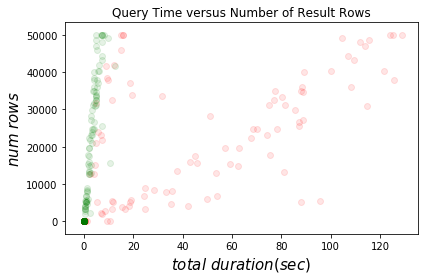

In [3]:
fig, ax = plt.subplots()

size = data["num_rows"] / 500
ax.scatter(data["int0_duration"], data["num_rows"], c='red', alpha=0.1)
ax.scatter(data["int1_duration"], data["num_rows"], c='green', alpha=0.1)

ax.set_xlabel("$total\ duration (sec)$", fontsize=15)
ax.set_ylabel("$num\ rows$", fontsize=15)
ax.set_title('Query Time versus Number of Result Rows')

#ax.grid(True)
fig.tight_layout()

plt.show()

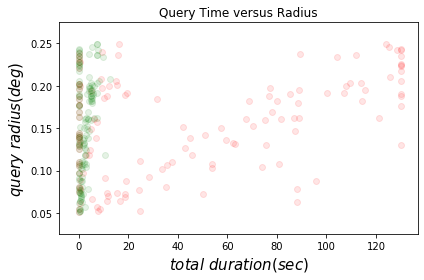

In [4]:
fig, ax = plt.subplots()

size = data["num_rows"] / 500
ax.scatter(data["int0_duration"], data["SR"], c='red', alpha=0.1)
ax.scatter(data["int1_duration"], data["SR"], c='green', alpha=0.1)

ax.set_xlabel("$total\ duration (sec)$", fontsize=15)
ax.set_ylabel("$query\ radius (deg)$", fontsize=15)
ax.set_title('Query Time versus Radius')

#ax.grid(True)
fig.tight_layout()

plt.show()

In [ ]:
def convert_date_string(date_string):
    dt = datetime.strptime(date_string, '%Y-%m-%d-%H:%M:%S.%f')
    new_string = dt.strftime('%Y-%m-%dT%H:%M:%S.%f')
    return new_string

In [ ]:

#short_data = data[0:500]
short_data = data
dts = [datetime.strptime(dt, '%Y-%m-%d-%H:%M:%S.%f') for dt in short_data['start_time']]

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(dts, short_data["int0_duration"] + short_data["int1_duration"], alpha=0.1)

ax.set_ylabel("$total\ duration (sec)$")

# format the ticks
locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
#locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.set_xlim(dts[0], dts[-1])
ax.set_title('Query Duration Over Time')

ax.grid(True)
#fig.autofmt_xdate()

plt.show()